In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load dataset
df = pd.read_csv("C:\\Users\\flyse\\OneDrive\\Desktop\\akshu\\DATA ANALYTICS\\RTA Dataset.csv")  

In [11]:
# Display first few rows
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [13]:
# Handling missing values (Updated)
df.ffill(inplace=True)


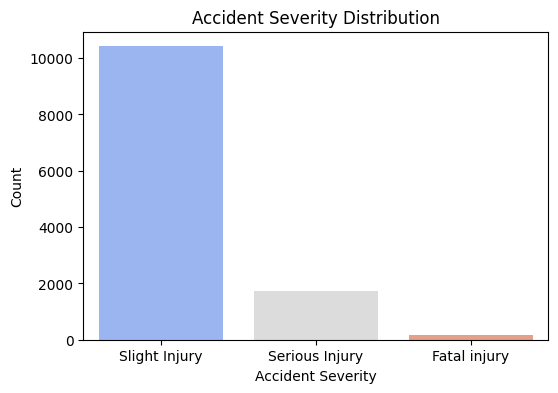

In [19]:
# Accident Analysis
accident_counts = df['Accident_severity'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=accident_counts.index, y=accident_counts.values, hue=accident_counts.index, palette='coolwarm', legend=False)
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Accident Severity Distribution")
plt.show()

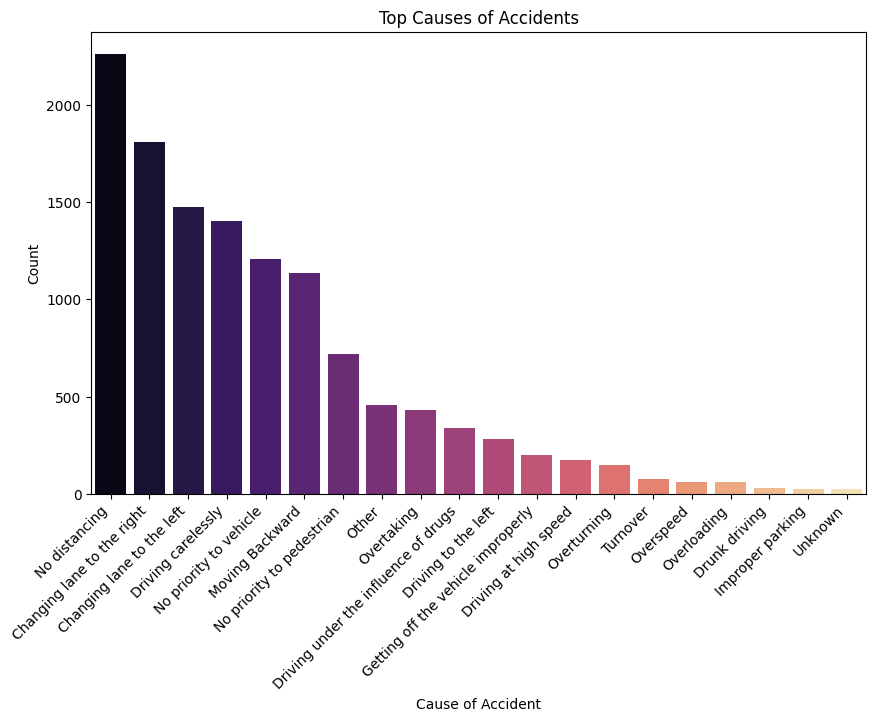

In [23]:
if 'Cause_of_accident' in df.columns:
    cause_counts = df['Cause_of_accident'].value_counts()
    plt.figure(figsize=(10,6))
    sns.barplot(x=cause_counts.index, y=cause_counts.values, hue=cause_counts.index, palette='magma', legend=False)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Cause of Accident")
    plt.ylabel("Count")
    plt.title("Top Causes of Accidents")
    plt.show()
else:
    print("Warning: 'Cause_of_Accident' column not found in dataset!")


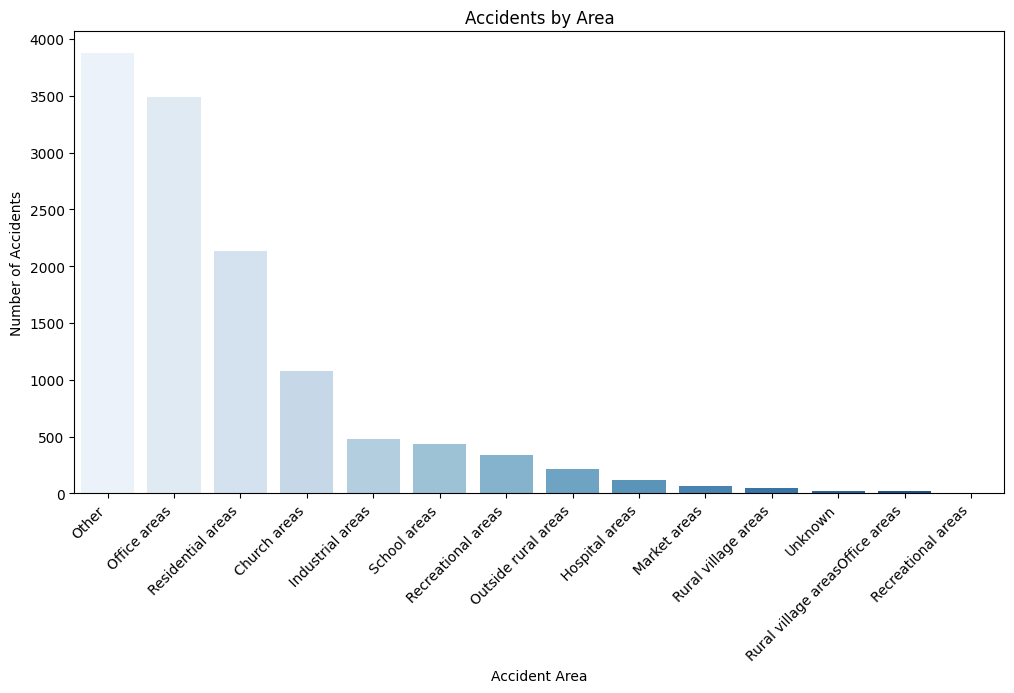

In [24]:
# Accidents by Area
area_counts = df['Area_accident_occured'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=area_counts.index, y=area_counts.values, hue=area_counts.index, palette='Blues', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Accident Area")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Area")
plt.show()

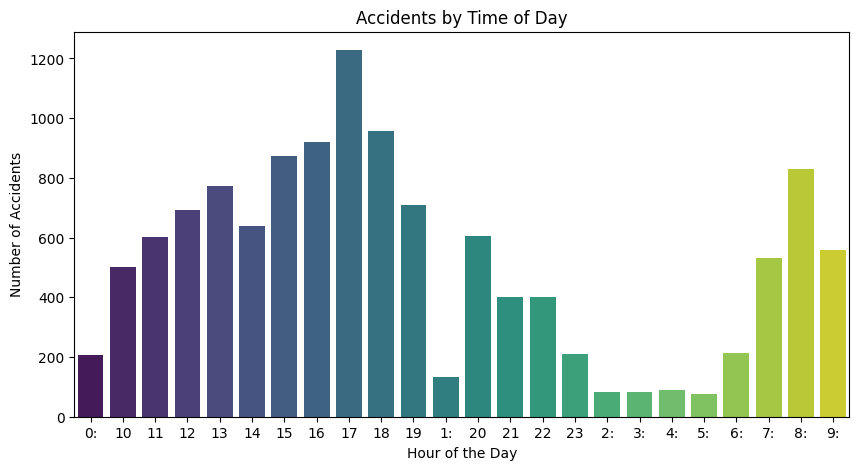

In [29]:

# Accidents by Time of Day
df['Hour'] = df['Time'].astype(str).str[:2]  # Extracting the hour from the Time column
accidents_per_hour = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=accidents_per_hour.index, y=accidents_per_hour.values, hue=accidents_per_hour.index, palette="viridis", legend=False)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Time of Day")
plt.show()





C:\Users\flyse\AppData\Local\Temp\ipykernel_27004\2248002886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values, palette="coolwarm")


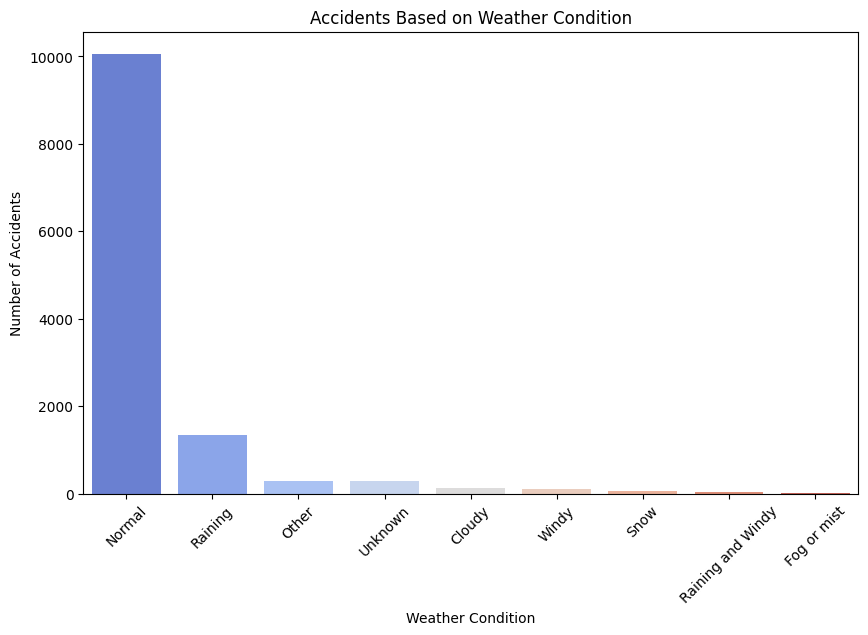

In [35]:
# Count accidents by weather condition
accidents_by_weather = df['Weather_conditions'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents Based on Weather Condition")
plt.show()


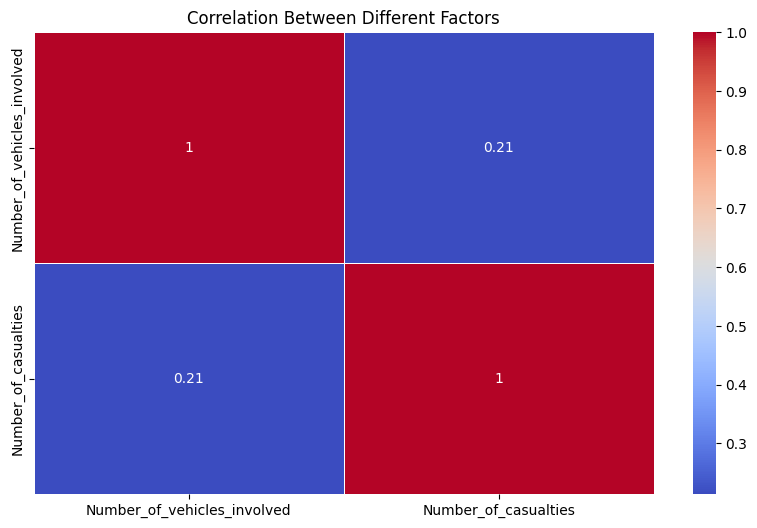

In [36]:
# General Correlation Matrix (Excluding Non-Numeric Columns)
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Different Factors")
plt.show()

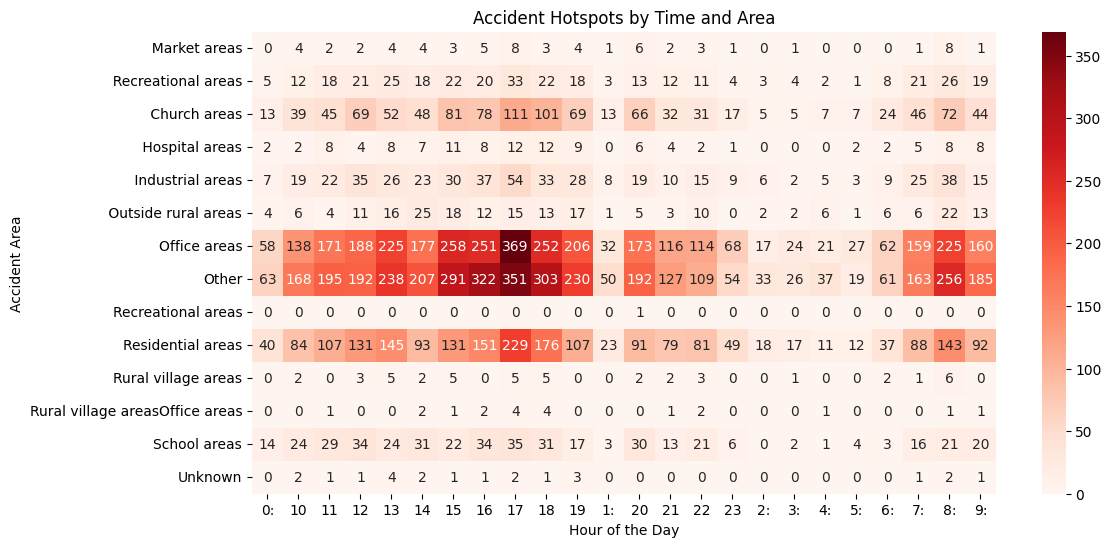

In [39]:
# Heatmap for accident hotspots (Time vs Area)
accident_heatmap = df.pivot_table(values='Accident_severity', index='Area_accident_occured', columns='Hour', aggfunc='count').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(accident_heatmap, cmap='Reds', annot=True, fmt='.0f')
plt.xlabel("Hour of the Day")
plt.ylabel("Accident Area")
plt.title("Accident Hotspots by Time and Area")
plt.show()

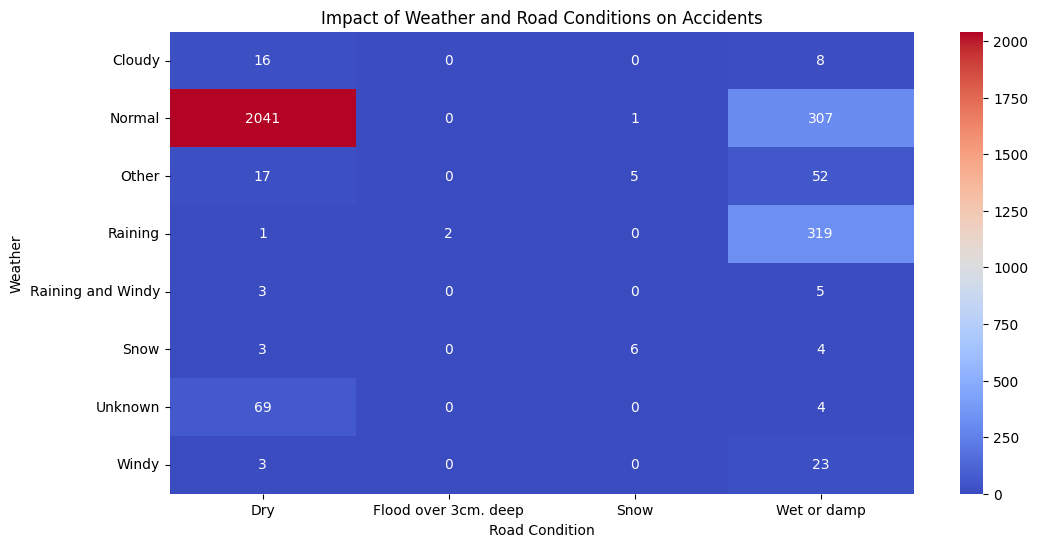

In [9]:
# Impact of Weather and Road Conditions
plt.figure(figsize=(12,6))
sns.heatmap(pd.crosstab(df['Weather_conditions'], df['Road_surface_conditions']), annot=True, fmt='d', cmap='coolwarm')
plt.title('Impact of Weather and Road Conditions on Accidents')
plt.xlabel('Road Condition')
plt.ylabel('Weather')
plt.show()


In [14]:
# Save cleaned dataset
df.to_csv("cleaned_RTA Dataset.csv", index=False)